### Metodo 2
Inizio con il creare la rete neurale più semplice possibile capace di approssimare un polinomio. Una rete con un solo hidden layer che secondo il teorema di approssimazione universale permette di approssimare qualsiasi funzione continua con accuratezza arbitraria. 

### Numero di neuroni per layer
- Il numero di neuroni dell'input e dell'ouput layer deve essere uguale alle "colonne" del vettore in ingresso e in uscita, essendo la funzione che approssimo reale a valori reali in numero di neuroni deve essere uno.


- Per l' hidden layer ci sono varie considerazioni da fare: se scelgo troppo pochi neuroni rischio l' underfitting della funzione, ovvero una sottostima. 
    
    Se scelgo un numero troppo grande di neuroni rischio un overfitting, cioè sto sovrastimando la funzione: è vero che più neuroni aggiungo al layer più sarà precisa l'approssimazione della funzione, ma questo vale se la rete riesce ad imparare. Quindi più è grande il numero di neuroni, più dovranno essere maggiore i dati di training e le epoche, questo comporta un maggior calcolo computazionale.
    Ho scelto per l' hidden layer 100 neuroni.
    
    
### Funzione di attivazione

La funzione di attivazione serve per togliere la linearità della rete che altrimenti non riuscirebbe ad approssimare una funzione di grado superiore al primo. Nel mio caso dopo alcune prove ho utilizzato la funzione selu.


Genero $N_{train}=5000$ punti di training e $N_{valid}=500$ punti di validation, un numero piuttosto elevato perchè come detto in precedenza utilizzando 100 neuroni la rete ha bisogno di molti punti di training.

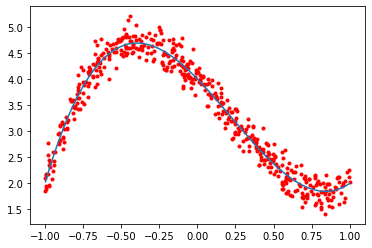

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a=3
b=-2
c=-3
d=4
N_train=5000
N_valid=500

#genero i punti in input
np.random.seed(0)

x_train = np.random.uniform(-1,1,N_train)
x_valid = np.random.uniform(-1,1,N_valid)
x_valid.sort()

y_target = a*x_valid**3 + b*x_valid**2 + c*x_valid + d


sigma=0.2
y_train = np.random.normal(a*x_train**3 + b*x_train**2 + c*x_train + d, sigma)
y_valid = np.random.normal(a*x_valid**3 + b*x_valid**2 + c*x_valid + d, sigma)

plt.scatter(x_valid,y_valid,c='r',marker='.')
plt.plot(x_valid,y_target)
plt.show()



Costruisco quindi la rete usando un modello sequenziale con un hidden layer denso e lo compilo utilizzando come ottimizzatore il gradiente di discesa stocastico, con la funzione mean-square-error sia per la loss che per la metrica. 

In [2]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


model=tf.keras.Sequential()
model.add(Dense(100, input_shape=(1,), activation="selu"))
model.add(Dense(1, activation='selu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Alleno la rete dividendo i dati in batch di dimensione 100 e fissando 50 epoche.

In [3]:
history = model.fit(x=x_train, y=y_train, batch_size=20,
          epochs=50, shuffle=True, validation_data=(x_valid, y_valid))

#model.get_weights()

Train on 5000 samples, validate on 500 samples
Epoch 1/50
5000/5000 [==============================] - 2s 433us/sample - loss: 0.7311 - mse: 0.7311 - val_loss: 0.5015 - val_mse: 0.5015
Epoch 2/50
5000/5000 [==============================] - 1s 149us/sample - loss: 0.4548 - mse: 0.4548 - val_loss: 0.4399 - val_mse: 0.4399
Epoch 3/50
5000/5000 [==============================] - 1s 147us/sample - loss: 0.3976 - mse: 0.3976 - val_loss: 0.3867 - val_mse: 0.3867
Epoch 4/50
5000/5000 [==============================] - 1s 148us/sample - loss: 0.3453 - mse: 0.3453 - val_loss: 0.3319 - val_mse: 0.3319
Epoch 5/50
5000/5000 [==============================] - 1s 212us/sample - loss: 0.2898 - mse: 0.2898 - val_loss: 0.2867 - val_mse: 0.2867
Epoch 6/50
5000/5000 [==============================] - 1s 191us/sample - loss: 0.2450 - mse: 0.2450 - val_loss: 0.2465 - val_mse: 0.2465
Epoch 7/50
5000/5000 [==============================] - 1s 143us/sample - loss: 0.2073 - mse: 0.2073 - val_loss: 0.2020 - val

Riporto di seguito il grafico della funzione costo sia per i dati di training che per quelli di validazione in funzione delle epoche. Come ci si può aspettare la funzione costo diminuisce mano a mano che la rete impara e nel momento in cui la rete non impara più rimane costante.

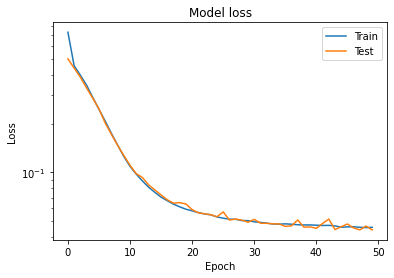

In [4]:
#score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Inifine predico con la rete allenata due set di punti uno all 'interno dell'intervallo di traning l'altro all' esterno. Si vede dai grafici come mano a mano che ci si allontana dall' intervallo in cui la rete ha imparato che quest' ultima perde il suo potere predittivo.

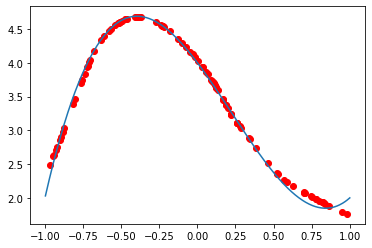

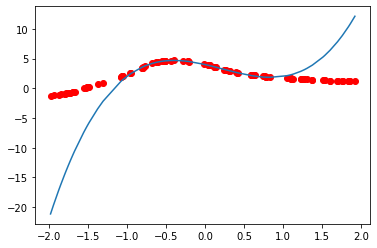

In [5]:
x_predicted_in = np.random.uniform(-1,1,100)
y_predicted_in=model.predict(x_predicted_in)


x_predicted_out = np.random.uniform(-2,2,100)
x_predicted_out.sort()
y_predicted_out=model.predict(x_predicted_out)
y_real_out = a*x_predicted_out**3 + b*x_predicted_out**2 + c*x_predicted_out + d

plt.scatter(x_predicted_in,y_predicted_in,c='r')
plt.plot(x_valid,y_target)
plt.show()

plt.scatter(x_predicted_out,y_predicted_out,c='r')
plt.plot(x_predicted_out,y_real_out)
plt.show()




### Più layer
Se aggiungo più hidden layer alla rete, posso ottenere gli stessi risultati di prima se non migliori in modo più efficiente. Posso abbassare il numero di neuroni per layer e quindi utilizzare meno punti di traninng e meno epoche abbassando la mole di calcolo computazionale.

Costruisco quindi una rete con tre hidden layer ognuno da 20 neuroni, vediamo come migliora la performance e l' accuratezza del fit.

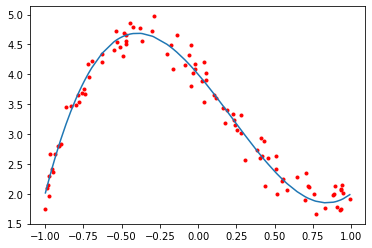

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [6]:
N_train=1000
N_valid=100

#genero i punti in input
np.random.seed(0)

x_train = np.random.uniform(-1,1,N_train)
x_valid = np.random.uniform(-1,1,N_valid)
x_valid.sort()

y_target = a*x_valid**3 + b*x_valid**2 + c*x_valid + d


sigma=0.2
y_train = np.random.normal(a*x_train**3 + b*x_train**2 + c*x_train + d, sigma)
y_valid = np.random.normal(a*x_valid**3 + b*x_valid**2 + c*x_valid + d, sigma)

plt.scatter(x_valid,y_valid,c='r',marker='.')
plt.plot(x_valid,y_target)
plt.show()


model=tf.keras.Sequential()
model.add(Dense(20, input_shape=(1,), activation="selu"))
model.add(Dense(20, input_shape=(1,), activation="selu"))
model.add(Dense(20, input_shape=(1,), activation="selu"))
model.add(Dense(1, activation='selu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

In [7]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] ='True'

history = model.fit(x=x_train, y=y_train, batch_size=20,
          epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

#model.get_weights()

Train on 1000 samples, validate on 100 samples
Epoch 1/30
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6889 - mse: 0.6889 - val_loss: 0.4786 - val_mse: 0.4786
Epoch 2/30
1000/1000 [==============================] - 0s 260us/sample - loss: 0.2729 - mse: 0.2729 - val_loss: 0.3404 - val_mse: 0.3404
Epoch 3/30
1000/1000 [==============================] - 0s 235us/sample - loss: 0.1860 - mse: 0.1860 - val_loss: 0.2155 - val_mse: 0.2155
Epoch 4/30
1000/1000 [==============================] - 0s 273us/sample - loss: 0.1291 - mse: 0.1291 - val_loss: 0.1476 - val_mse: 0.1476
Epoch 5/30
1000/1000 [==============================] - 0s 227us/sample - loss: 0.1001 - mse: 0.1001 - val_loss: 0.1186 - val_mse: 0.1186
Epoch 6/30
1000/1000 [==============================] - 0s 317us/sample - loss: 0.0826 - mse: 0.0826 - val_loss: 0.1024 - val_mse: 0.1024
Epoch 7/30
1000/1000 [==============================] - 0s 203us/sample - loss: 0.0710 - mse: 0.0710 - val_loss: 0.0767 - val_m

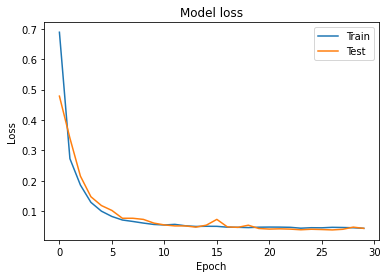

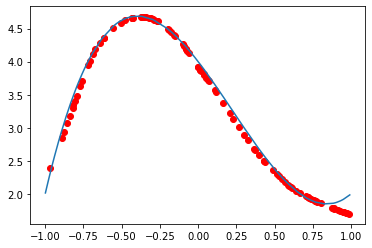

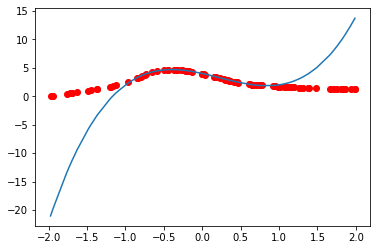

In [8]:
#score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted_in = np.random.uniform(-1,1,100)
y_predicted_in=model.predict(x_predicted_in)


x_predicted_out = np.random.uniform(-2,2,100)
x_predicted_out.sort()
y_predicted_out=model.predict(x_predicted_out)
y_real_out = a*x_predicted_out**3 + b*x_predicted_out**2 + c*x_predicted_out + d

plt.scatter(x_predicted_in,y_predicted_in,c='r')
plt.plot(x_valid,y_target)
plt.show()

plt.scatter(x_predicted_out,y_predicted_out,c='r')
plt.plot(x_predicted_out,y_real_out)
plt.show()

Ottengo un risultato ugualmente buono, ma con un tempo di processo notevolmente ridotto.